In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.backend import clear_session

In [132]:
california_housing_dataset = fetch_california_housing()

In [133]:
print(california_housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [134]:
data = california_housing_dataset.data
target = california_housing_dataset.target

In [135]:
print(data.shape)
print(target.shape)

(20640, 8)
(20640,)


In [136]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [137]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
clear_session()
model = Sequential([
    Dense(300, activation=relu, input_shape=X_train[0].shape),
    Dense(100, activation=relu, input_shape=X_train[0].shape),
    Dense(1)
])

In [139]:
model.compile(
    loss=mean_squared_error,
    optimizer=SGD(learning_rate=0.001)
)

In [140]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               2700      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 32,901
Trainable params: 32,901
Non-trainable params: 0
_________________________________________________________________


In [141]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

Train on 13932 samples, validate on 1548 samples
Epoch 1/30
13932/13932 [==============================] - 2s 144us/sample - loss: 1.6604 - val_loss: 0.7408

In [142]:
model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.398446274127147

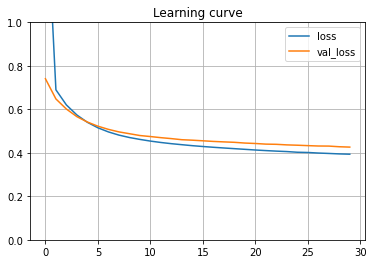

In [143]:
pd.DataFrame(history.history).plot()
plt.title("Learning curve")
plt.grid(True)
plt.gca().set_ylim((0,1))
plt.show()

In [144]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [145]:
print(y_pred)

[[0.5639059]
 [1.6779134]
 [3.3687403]]


In [146]:
print(y_test[:3])


[0.477   0.458   5.00001]
